# Project Description

A telecom operator called Interconnect wants to forecast the churn rate of their clients.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀡󠀳󠀰 If it is known that a client is planning to quit, the client will be offered promotional codes and special plan options.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀢󠀳󠀰 Interconnect's marketing team has collected some of the client's personal data, including information about the chosen data plan and their contract.

Interconnect Services
󠀰Interconnect provides two main types of services:


1. Home telephone network.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀦󠀳󠀰 A telephone can be connected to multiple lines simultaneously.
2. Internet.󠀲󠀡󠀠󠀥󠀨󠀣󠀤󠀨󠀳󠀰 Internet networks can be set up via a telephone line (DSL, digital subscriber line) or via fiber optic cable.


󠀰Some of the other services Interconnect provides include:
- Internet security: antivirus software (DeviceProtection) and malicious website blocker (OnlineSecurity)
- Dedicated technical support line (TechSupport)
- Cloud storage for files and data backup (OnlineBackup)
- Streaming TV (StreamingTV) and movie directory (StreamingMovies)

Data Description
󠀰The available data consists of several files obtained from different sources:
- contract.csv - 󠀰contract information
- personal.csv - 󠀰client's personal data
- internet.csv - information about Internet services
- phone.csv - information about phone services


# Data Preparation

In [1]:
# Load library
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score, classification_report,auc
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.utils import shuffle

In [2]:
# Load data
contract = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Sprint17\contract.csv')
personal = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Sprint17\personal.csv')
internet = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Sprint17\internet.csv')
phone = pd.read_csv('D:\Pekerjaan\Data Science Bootcamp\Sprint17\phone.csv')

In [3]:
# Show shape of contract data 
contract.shape

(7043, 8)

In [4]:
# show shape of user data
personal.shape

(7043, 5)

In [5]:
# show shape of internet data
internet.shape

(5517, 8)

In [6]:
# show shape of telephone data
phone.shape

(6361, 2)

In [7]:
# Show contract data
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [8]:
# Show user data
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [9]:
# Merge all dataset 
df = personal.merge(contract, left_on=['customerID'], right_on=['customerID'], how='left')
df = df.merge(phone, left_on=['customerID'], right_on=['customerID'], how='left')
df = df.merge(internet, left_on=['customerID'], right_on=['customerID'], how='left')

In [10]:
# Show dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,Female,0,Yes,No,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,NaN,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,Male,0,No,No,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,Male,0,No,No,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,Male,0,No,No,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,NaN,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Female,0,No,No,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,No,Fiber optic,No,No,No,No,No,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   BeginDate         7043 non-null   object 
 6   EndDate           7043 non-null   object 
 7   Type              7043 non-null   object 
 8   PaperlessBilling  7043 non-null   object 
 9   PaymentMethod     7043 non-null   object 
 10  MonthlyCharges    7043 non-null   float64
 11  TotalCharges      7043 non-null   object 
 12  MultipleLines     6361 non-null   object 
 13  InternetService   5517 non-null   object 
 14  OnlineSecurity    5517 non-null   object 
 15  OnlineBackup      5517 non-null   object 
 16  DeviceProtection  5517 non-null   object 


In [12]:
# change column name
df.columns=df.columns.str.lower()

In [13]:
# checking missing value
df.isna().sum()

customerid             0
gender                 0
seniorcitizen          0
partner                0
dependents             0
begindate              0
enddate                0
type                   0
paperlessbilling       0
paymentmethod          0
monthlycharges         0
totalcharges           0
multiplelines        682
internetservice     1526
onlinesecurity      1526
onlinebackup        1526
deviceprotection    1526
techsupport         1526
streamingtv         1526
streamingmovies     1526
dtype: int64

In [14]:
# fill missing value from 'totalcharges' column 
df['totalcharges'] = df['totalcharges'].replace(" ",0).astype(np.float64)

In [15]:
# fill missing value
df = df.fillna('No')

In [16]:
df.duplicated().sum()

0

In [17]:
# change date value format
df['begindate'] = pd.to_datetime(df['begindate'], format='%Y-%m-%d')
df['enddate'] = pd.to_datetime(df['enddate'], format='%Y-%m-%d', errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerid        7043 non-null   object        
 1   gender            7043 non-null   object        
 2   seniorcitizen     7043 non-null   int64         
 3   partner           7043 non-null   object        
 4   dependents        7043 non-null   object        
 5   begindate         7043 non-null   datetime64[ns]
 6   enddate           1869 non-null   datetime64[ns]
 7   type              7043 non-null   object        
 8   paperlessbilling  7043 non-null   object        
 9   paymentmethod     7043 non-null   object        
 10  monthlycharges    7043 non-null   float64       
 11  totalcharges      7043 non-null   float64       
 12  multiplelines     7043 non-null   object        
 13  internetservice   7043 non-null   object        
 14  onlinesecurity    7043 n

# Exploratory Data Analysis

<Axes: >

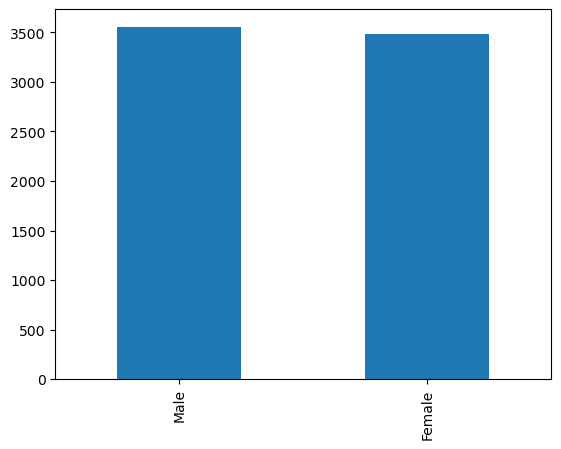

In [19]:
# show value of 'gender' column
df['gender'].value_counts().plot(kind='bar')

<Axes: xlabel='internetservice,type'>

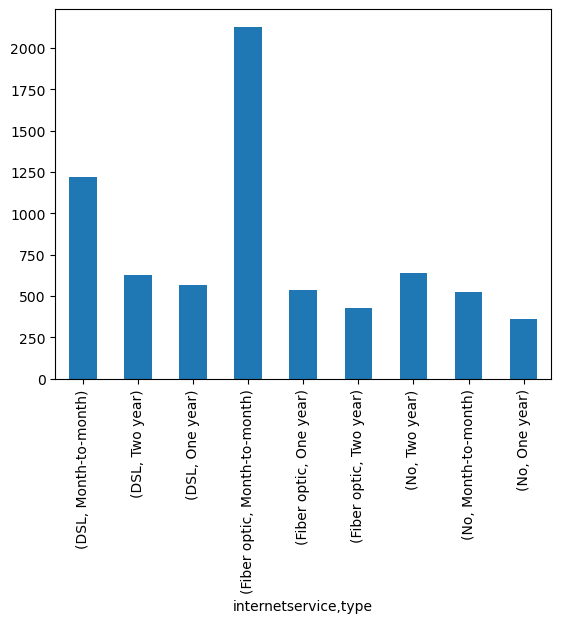

In [20]:
# fill type value based internet service
df[['type','internetservice']].groupby('internetservice').value_counts().plot(kind='bar')

In [21]:
# add 'num_days' column
df['num_days'] = (df['enddate']-df['begindate']).dt.days

<Axes: xlabel='internetservice'>

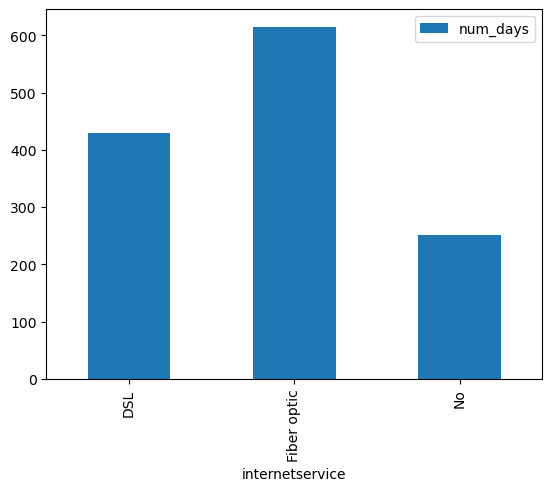

In [22]:
# show the average of num_days based internet service
df[['num_days','internetservice']].groupby('internetservice').mean().plot(kind='bar')

<Axes: xlabel='internetservice'>

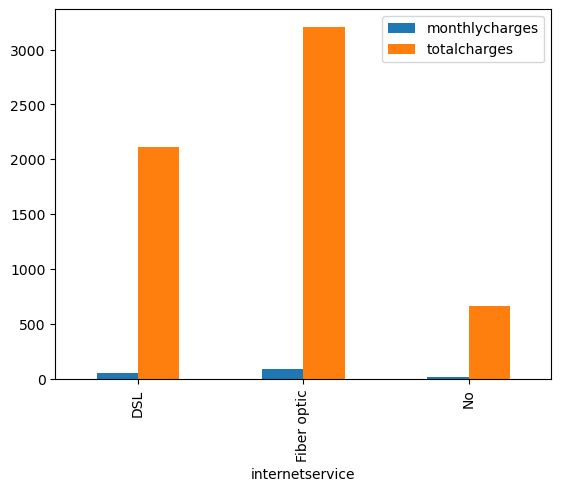

In [23]:
# show the average of monthly charges based internet service
df[['monthlycharges','totalcharges','internetservice']].groupby('internetservice').mean().plot(kind='bar')

In [24]:
# show type value based internet service
df_service=df[['onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingtv','streamingmovies']]
for i in df_service:
    print(i)
    print(df_service[i].value_counts())

onlinesecurity
No     5024
Yes    2019
Name: onlinesecurity, dtype: int64
onlinebackup
No     4614
Yes    2429
Name: onlinebackup, dtype: int64
deviceprotection
No     4621
Yes    2422
Name: deviceprotection, dtype: int64
techsupport
No     4999
Yes    2044
Name: techsupport, dtype: int64
streamingtv
No     4336
Yes    2707
Name: streamingtv, dtype: int64
streamingmovies
No     4311
Yes    2732
Name: streamingmovies, dtype: int64


## Temporary Conclusion

- Clients generally use fiber optic internet services with monthly payments.
- Fiber optic is the internet service that clients have used the longest and also provides the most profit.
- Other services that clients often use are movie streaming services and tech support.

# Modelling

In [25]:
# make target column
df['is_churned'] = df['enddate'].apply(lambda x: 0 if pd.isna(x) else 1)

In [26]:
# delete columns that are not needed
df_drop = ['begindate', 'enddate', 'customerid', 'num_days']
df = df.drop(columns=df_drop)

In [27]:
# One Hot Encoding
cat_cols = ['partner','gender','dependents','type','paperlessbilling','paymentmethod','multiplelines', 'internetservice', 'onlinesecurity',
                    'onlinebackup', 'deviceprotection', 'techsupport',
                    'streamingtv', 'streamingmovies']
df_num = df.drop(columns=cat_cols)
ohe = pd.get_dummies(df[cat_cols])

In [28]:
# merge numeric column and categoric column
df_ohe = pd.concat([df_num,ohe],axis=1)

In [29]:
# show dataframe that already merged
df_ohe.head()

,seniorcitizen,monthlycharges,totalcharges,is_churned,partner_No,partner_Yes,gender_Female,gender_Male,dependents_No,dependents_Yes,...,onlinebackup_No,onlinebackup_Yes,deviceprotection_No,deviceprotection_Yes,techsupport_No,techsupport_Yes,streamingtv_No,streamingtv_Yes,streamingmovies_No,streamingmovies_Yes
0,0,29.85,29.85,0,0,1,1,0,1,0,...,0,1,1,0,1,0,1,0,1,0
1,0,56.95,1889.50,0,1,0,0,1,1,0,...,1,0,0,1,1,0,1,0,1,0
2,0,53.85,108.15,1,1,0,0,1,1,0,...,0,1,1,0,1,0,1,0,1,0
3,0,42.30,1840.75,0,1,0,0,1,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,1,0,1,0,1,0,1,0,1,0


In [30]:
# split train and test set
train, test = train_test_split(df_ohe, random_state=12345, test_size=0.1)

In [31]:
# show the shape of train and test set
train.shape, test.shape

((6338, 36), (705, 36))

In [32]:
# make features and target
target = 'is_churned'
features_train, target_train = train.drop([target], axis=1), train[target]
features_test, target_test = test.drop([target], axis=1), test[target]


In [33]:
# function for upsampling 
def upsample (features,target,repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + ([features_ones]*repeat))
    target_upsampled = pd.concat([target_zeros] + ([target_ones]*repeat))
    
    features_upsampled,target_upsampled = shuffle(features_upsampled,target_upsampled,random_state=12345)
    return features_upsampled,target_upsampled

In [34]:
# upsampling data
features_train, target_train = upsample (features_train,target_train,3)

In [35]:
# show the total of unique value in target
target_train.value_counts()

1    5037
0    4659
Name: is_churned, dtype: int64

In [36]:
# scorer function
def roc_auc_scorer(y_true, y_pred):
    return roc_auc_score(y_true, y_pred)

In [37]:
# make scorer model
roc = make_scorer(roc_auc_scorer, needs_threshold=True)

In [38]:
# function for model

def build_model(model, features_train, target_train, features_test, target_test, 
                hyperparameters={}, 
                scoring=None, cv=5):
    model = model
    model.fit(features_train, target_train)

    gs = GridSearchCV(model, param_grid=hyperparameters, cv=cv, scoring=scoring)
    gs.fit(features_train, target_train)
    preds = gs.best_estimator_.predict_proba(features_test)[:, 1]
    best_score = roc_auc_score(target_test, preds)
    
    return gs.best_estimator_, best_score

In [39]:
# function for evaluating model
def model_performance(target, predictions,predict_proba):
    
    fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, sharex=False, sharey=False,figsize=[15,5])
    ax1.bar(x=target.value_counts().index.astype(str), height=target.value_counts().to_list(), data=target, color=['b','r'])
    
    metric = metrics.confusion_matrix(target,predictions)
    confusion_dataframe = pd.DataFrame(data=metric, index=['Actual_Positive','Actual_Negative'], columns=['Guessed_Positive', 'Guessed_Negative'])
    sns.heatmap(confusion_dataframe, annot=True, fmt="d", cmap="YlGnBu", ax = ax2)
    
    fpr, tpr, _ = (metrics.roc_curve(target,predict_proba))
    plt.plot(fpr, tpr)
    
    fpr, tpr, _ = (metrics.roc_curve(target,predict_proba))
    ax3.plot(fpr, tpr)
    roc_auc = auc(fpr, tpr)
    ax3.plot([0, 1], [0, 1], 'k--', label='AUC = %0.3f'% roc_auc)
    ax3.legend(loc='lower right')
    ax3.plot([0,1],[0,1],'r--')
    ax3.set_xlim([-0.1,1.0])
    ax3.set_ylim([-0.1,1.01])
    ax3.set_ylabel('True Positive Rate')
    ax3.set_xlabel('False Positive Rate')
    plt.tight_layout()
    print(f'Area Under the Curve: {round(roc_auc,2)}')
    
    plt.show()
    print(classification_report(target,predictions))
    print(metric)

# Dummy

In [40]:
dc = DummyClassifier()
best_dc_model, best_dc_auc = build_model(dc, features_train, target_train, 
                                                        features_test, target_test,
                                                        hyperparameters={},scoring=roc, cv=2)

Area Under the Curve: 0.5


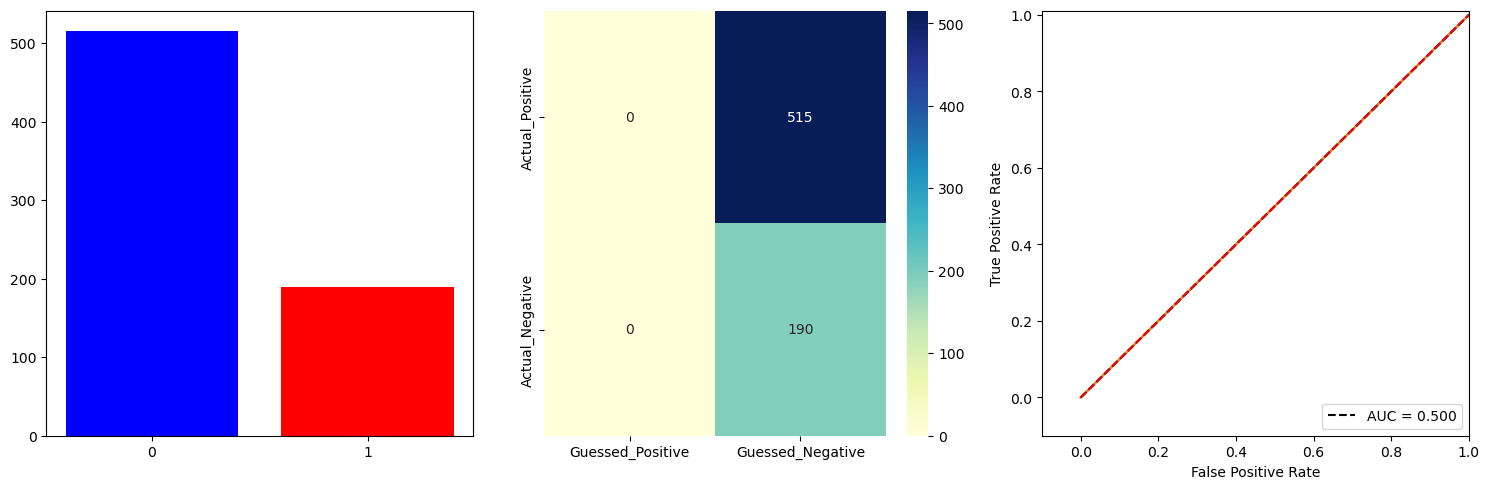

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       515
           1       0.27      1.00      0.42       190

    accuracy                           0.27       705
   macro avg       0.13      0.50      0.21       705
weighted avg       0.07      0.27      0.11       705

[[  0 515]
 [  0 190]]


D:\Pekerjaan\Data Science Bootcamp\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Pekerjaan\Data Science Bootcamp\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Pekerjaan\Data Science Bootcamp\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [41]:
predictions = best_dc_model.predict(features_test)
predict_proba = best_dc_model.predict_proba(features_test)[:, 1]
model_performance(pd.Series(target_test),pd.Series(predictions),predict_proba)

# Linear Regression

In [42]:
lr = LogisticRegression(class_weight='balanced', random_state=12345)
best_lr_model, best_lr_auc= build_model(lr, features_train, target_train, 
                                                        features_test, target_test,
                                                        hyperparameters={'C' : [.001, .01, .1, 1, 10]}, scoring=roc, cv=5)

D:\Pekerjaan\Data Science Bootcamp\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Pekerjaan\Data Science Bootcamp\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Area Under the Curve: 0.84


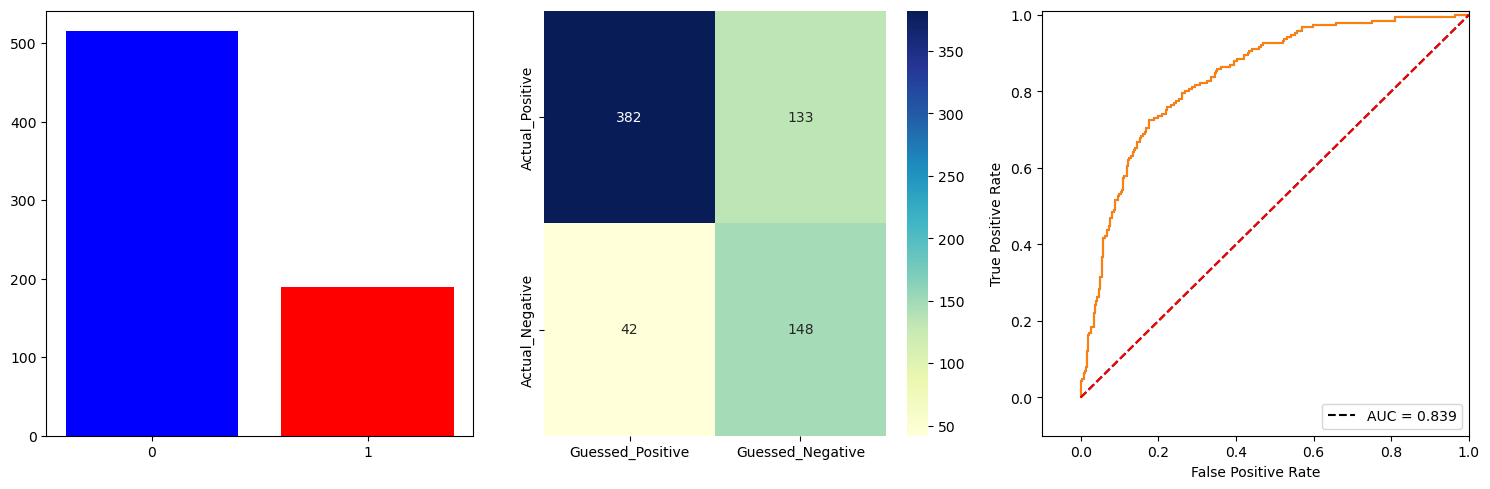

              precision    recall  f1-score   support

           0       0.90      0.74      0.81       515
           1       0.53      0.78      0.63       190

    accuracy                           0.75       705
   macro avg       0.71      0.76      0.72       705
weighted avg       0.80      0.75      0.76       705

[[382 133]
 [ 42 148]]


In [43]:
predictions = best_lr_model.predict(features_test)
predict_proba = best_lr_model.predict_proba(features_test)[:, 1]
model_performance(pd.Series(target_test),pd.Series(predictions),predict_proba)

# Random Forest

In [44]:
rf = RandomForestClassifier(class_weight='balanced', min_samples_leaf=30, random_state=12345)
best_rf_model, best_rf_auc = build_model(rf, features_train, target_train, 
                                                        features_test, target_test,
                                                        hyperparameters={'n_estimators': range(100, 500, 100),
                                                                        'max_depth': range(1, 10)
                                                                        }, scoring=roc, cv=5)

Area Under the Curve: 0.86


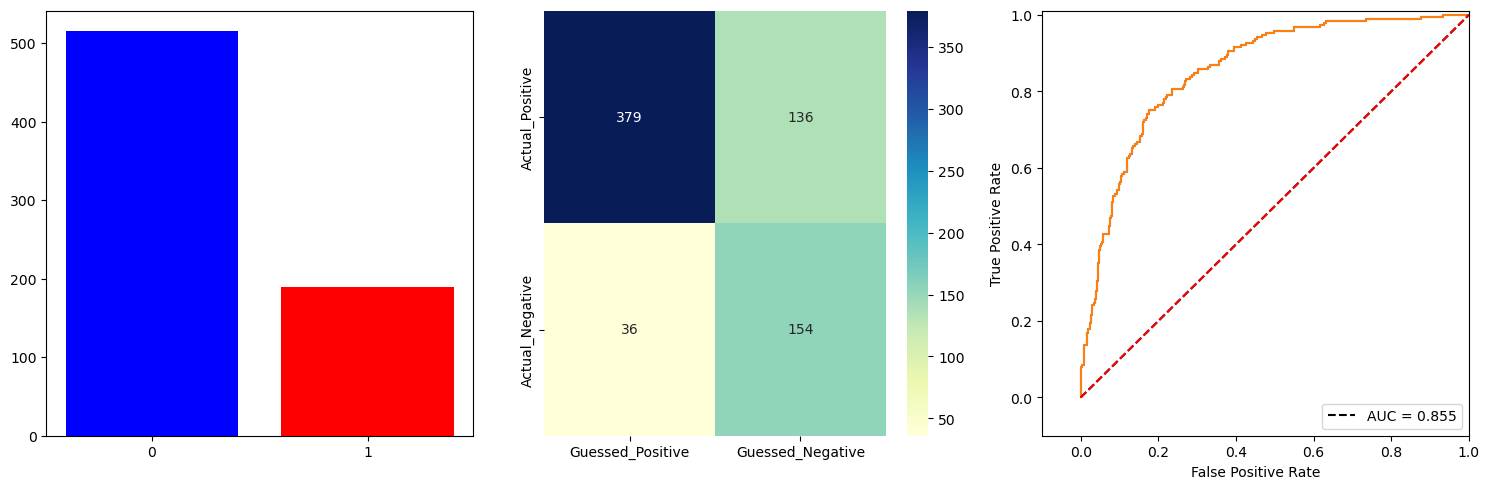

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       515
           1       0.53      0.81      0.64       190

    accuracy                           0.76       705
   macro avg       0.72      0.77      0.73       705
weighted avg       0.81      0.76      0.77       705

[[379 136]
 [ 36 154]]


In [45]:
predictions = best_rf_model.predict(features_test)
predict_proba = best_rf_model.predict_proba(features_test)[:, 1]
model_performance(pd.Series(target_test),pd.Series(predictions),predict_proba)

# Decision Tree

In [46]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=12345)
best_dt_model, best_dt_auc = build_model(dt, features_train, target_train, 
                                                        features_test, target_test,
                                                        hyperparameters={'max_depth': range(1, 10)}, scoring=roc, cv=2)

Area Under the Curve: 0.84


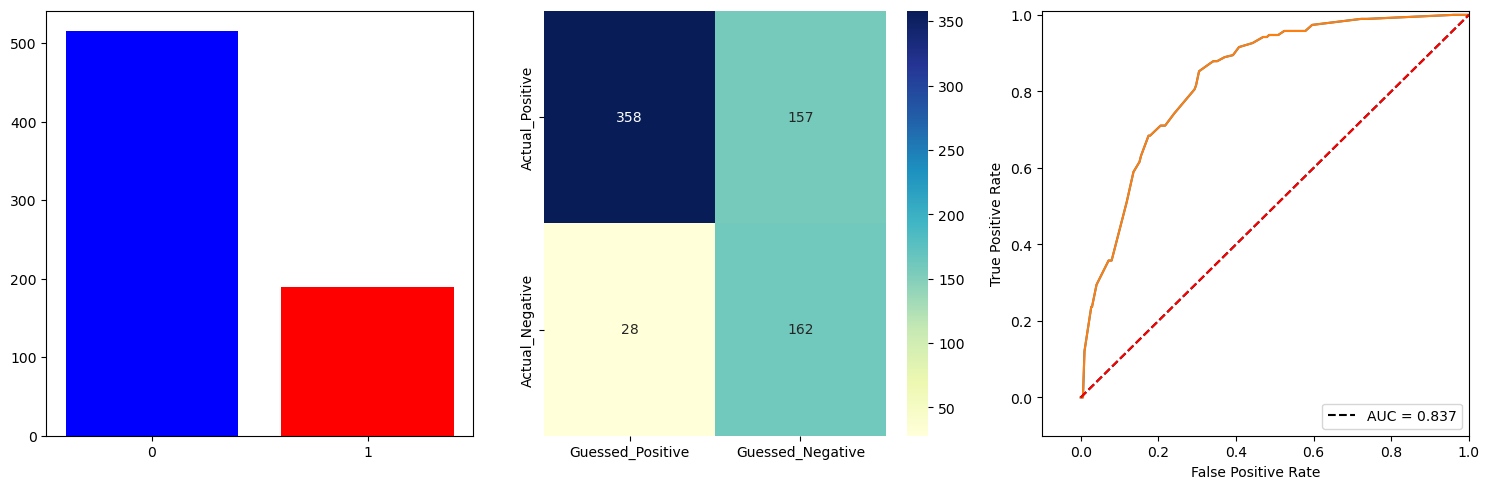

              precision    recall  f1-score   support

           0       0.93      0.70      0.79       515
           1       0.51      0.85      0.64       190

    accuracy                           0.74       705
   macro avg       0.72      0.77      0.72       705
weighted avg       0.81      0.74      0.75       705

[[358 157]
 [ 28 162]]


In [47]:
predictions = best_dt_model.predict(features_test)
predict_proba = best_dt_model.predict_proba(features_test)[:, 1]
model_performance(pd.Series(target_test),pd.Series(predictions),predict_proba)

# XGBoost

In [48]:
xgb = XGBClassifier(class_weight='balanced', random_state=12345)
best_xgb_model, best_xgb_auc = build_model(dt, features_train, target_train, 
                                                        features_test, target_test,
                                                        hyperparameters={'max_depth': range(1, 10)}, scoring=roc, cv=5)

Area Under the Curve: 0.8


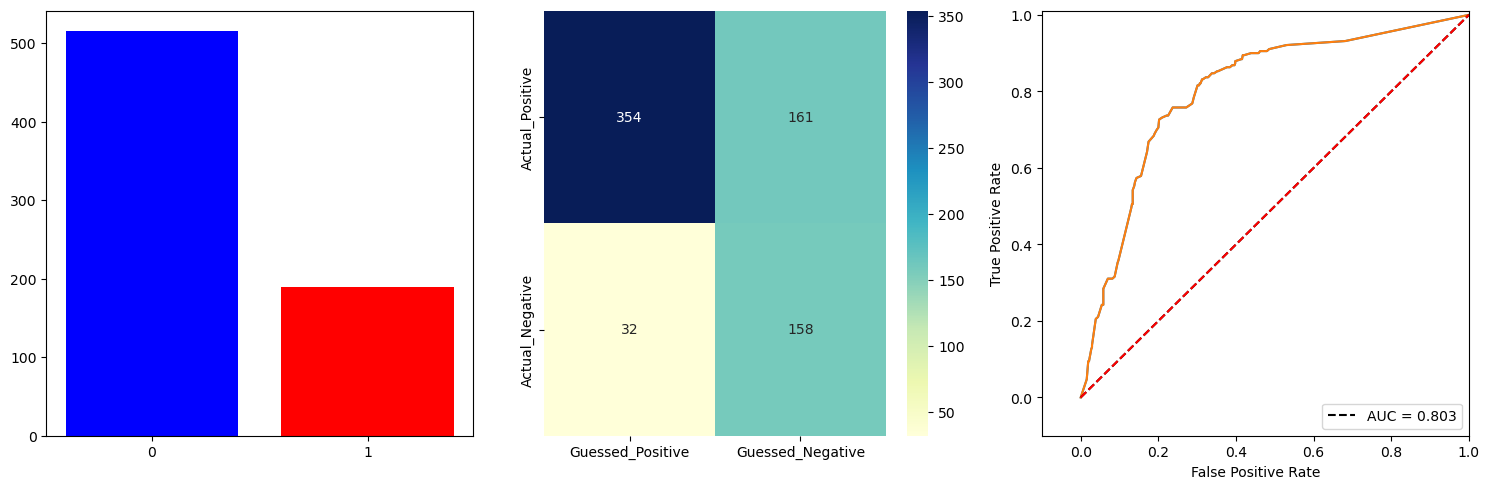

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       515
           1       0.50      0.83      0.62       190

    accuracy                           0.73       705
   macro avg       0.71      0.76      0.70       705
weighted avg       0.80      0.73      0.74       705

[[354 161]
 [ 32 158]]


In [49]:
predictions = best_xgb_model.predict(features_test)
predict_proba = best_xgb_model.predict_proba(features_test)[:, 1]
model_performance(pd.Series(target_test),pd.Series(predictions),predict_proba)

In [50]:
# make dataframe of model result
df_model_results = pd.DataFrame({'model': [
                                           'Dummy','LinearRegression','RandomForestClassifier','DecisionTreeClassifier','XGBoostClassifier'],
              'best_auc': [best_dc_auc, best_lr_auc, best_rf_auc, best_dt_auc, best_xgb_auc]})
df_model_results

,model,best_auc
0,Dummy,0.500000
1,LinearRegression,0.839039
2,RandomForestClassifier,0.855330
3,DecisionTreeClassifier,0.836929
4,XGBoostClassifier,0.803229


# General conclusion

- Column `totalcharges` has object format and will be converted to float64
- Columns `partner`,`gender`,`dependents`,'`type`,`paperlessbilling`,`paymentmethod`,`multiplelines`, `internetservice`, `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv`, `streamingmovies` are categorical data and require OHE to be a feature.
- Column `is_churned` is a target taken from column `enddate` which means 'No' = 0 and 'Yes' = 1
- Columns `begindate`, `enddate`, `customerid`, `num_days` are not included in the feature
- The division of train and test set is 90:10
- The highest scoring model is Random Forest with a ROC-AUC score of 0.86, but given the time constraints, it is recommended to use the Linear Regression model with the second highest metric score of 0.84.
- With this model, interconnects can forecast their client churn rate

# Steps taken

1. Preparing the data included merging separate data into one dataset, reviewing the format of each column, reviewing missing and duplicated values.
2. Exploratory data analysis by looking at all columns including the number of unique values in each column and overall user behavior with the aim of understanding the picture of the data to be used.
3. One Hot Encoding on categorical columns consisting of `partner`, `gender`, `dependents`, `type`, `paperlessbilling`, `paymentmethod`, `multiplelines`, `internetservice`, `onlinesecurity`, `onlinebackup`, `deviceprotection`, `techsupport`, `streamingtv` and `streamingmovies`.
4. Splitting the data into train and test sets with a ratio of 90:10.
5. Upsampling the data to 3 times.
6. Modeling using 5 models with one model is dummy as a threshold value, the other 4 models are LinearRegression, RandomForestClassifier, DecisionTreeClassifier and XGBoostClassifier with the help of GridSearchCV to get the best hyperparamater and use 5 cross validation.

# Steps to skip
1. Doing deeper EDA
2. Testing 2 - 3 datasets for modeling to see which data comparison yields the highest score 3.

# Key Steps

1. Data Upsampling
2. Using GridSearchCV

# Final Model

Based on the test time and score, the final model chosen was LogisticRegression with a ROC-AUC score of 84%.